# Lok Sabha Elections 2024

##### Kunal Gupta Batch Code: 8905
##### Mentor: Rajshri Thete

In [3]:
!pip install mysql-connector-python
!pip install pymysql
!pip3 install pymysql

# Import necessary packages

In [9]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Insight
Installed all necessary packages


In [10]:
connection = mysql.connector.connect(
    user='root',
    password='root',
    host='localhost',
    port=3306,
    database='lok_sabha_election'  # write here database name 
)

#### Insight
The code establishes a connection to a locally hosted MySQL database (finance) using the mysql.connector.connect method, allowing you to perform SQL operations in Python. Ensure to manage sensitive data securely and handle errors appropriately.

In [11]:
# SQL query to join Applicants and Loans tables
query = """
SELECT * 
FROM voter_details;
"""

# Exploratory Data Analysis

In [13]:
# Load the data into a pandas DataFrame
df = pd.read_sql(query,connection)
df.head() # Display the first few rows of the data

# Close the connection
#db_connection.close()

C:\Users\User\AppData\Local\Temp\ipykernel_17208\1252240177.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,connection)


,ID,State,Constituency,Candidate,Party,EVM_Votes,Postal_Votes,Total_Votes,Percentage_Of_Votes,Result
0,1,Uttar Pradesh,Varanasi,NARENDRA MODI,Bharatiya Janata Party,611439,1531,612970,54.24,Won
1,2,Uttar Pradesh,Varanasi,AJAY RAI,Indian National Congress,459084,1373,460457,40.74,Lost
2,3,Uttar Pradesh,Rae Bareli,RAHUL GANDHI,Indian National Congress,686044,1605,687649,66.17,Won
3,4,Uttar Pradesh,Lucknow,RAJ NATH SINGH,Bharatiya Janata Party,610597,2112,612709,53.89,Won
4,5,Uttar Pradesh,Kannauj,AKHILESH YADAV,Samajwadi Party,640207,2085,642292,52.74,Won


#### Insight
The command df.shape returns the dimensions of the DataFrame df in the form of a tuple.

### Details_About_Column

##### 1)ID: A unique ID.
##### 2)State : Contains the names of the states and Union Territores of India.
##### 3)Constituency: Contains the names of the constituency in which the votes have been accounted for
##### 4)Candidate: There stood unique candidates in this year's Lok Sabha Elections. Each candidate was either from a party, or an independent candidate. 
##### 5)Party: A different parties had their registered candidates in the elections, including Independent candidates and 'None of the above (NOTA)"
##### 6)EVM_Votes: Number of EVM Votes secured by respective candidates. 
##### 7)EVM_Votes: Number of postal votes secured by respective candidates.
##### 8)Total _Votes: Total number of votes, by adding the postal votes and evm votes.
##### 9)Percentage_Of_Votes: Percentage of votes secured by that candidate, in that constituency.
##### 10)Result: Says whether that candidate won or lost.

### Data Overview

In [14]:
# Prints the shape i.e. the row size by column size of the dataset
df.shape

(100, 10)

### Insight
The command df.shape returns the dimensions of the DataFrame df in the form of a tuple.

In [15]:
# Gives the overall info of the dataframe object
df.describe()

,ID,EVM_Votes,Postal_Votes,Total_Votes,Percentage_Of_Votes
count,100.000000,1.000000e+02,100.000000,1.000000e+02,100.000000
mean,50.500000,5.799990e+05,3368.990000,5.833680e+05,45.648400
std,29.011492,2.025624e+05,2637.628448,2.038019e+05,13.728119
min,1.000000,5.148600e+04,173.000000,5.165900e+04,3.310000
25%,25.750000,4.628242e+05,1528.250000,4.655600e+05,37.872500
50%,50.500000,5.980455e+05,2542.000000,5.998520e+05,46.025000
75%,75.250000,7.007458e+05,4501.500000,7.041885e+05,54.097500
max,100.000000,1.223746e+06,13583.000000,1.226751e+06,78.540000


##### Insight
It provides statistics like count, mean, standard deviation (std), minimum (min), 25th percentile (25%), median (50%), 75th percentile (75%), and maximum (max) for each numerical column.

In [62]:
# for understanding stastical summary we will take ID

# 1. The count is 100.

# 2. The mean rating is 50.50 .

# 3. The standard deviation rating of the rating is 29.01.

# 4. The min ratings is 1.

# 5. The 25th percentile of the ratings is 25.75.

# 6. The 50th percentile of the ratings is 50.50.

# 7. The 75th percentile of the ratings is 75.25.

# 8. The maximum rating is 100.

In [16]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   100 non-null    int64  
 1   State                100 non-null    object 
 2   Constituency         100 non-null    object 
 3   Candidate            100 non-null    object 
 4   Party                100 non-null    object 
 5   EVM_Votes            100 non-null    int64  
 6   Postal_Votes         100 non-null    int64  
 7   Total_Votes          100 non-null    int64  
 8   Percentage_Of_Votes  100 non-null    float64
 9   Result               100 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.9+ KB


##### Insight
It displays the number of non-null entries, data types of each column, memory usage, and the total number of columns and rows. This is useful for understanding the structure of the DataFrame, identifying missing values, and verifying data types before processing or analysis.

In [17]:
# It is used to identify and count missing values (NaNs) in a DataFrame
df.isnull().sum()

ID                     0
State                  0
Constituency           0
Candidate              0
Party                  0
EVM_Votes              0
Postal_Votes           0
Total_Votes            0
Percentage_Of_Votes    0
Result                 0
dtype: int64

##### Insight
It helps in identifying which columns have missing data and how many null values exist in each column. This is crucial for handling data cleaning tasks like imputing or removing missing values.

# Check for duplicates

In [18]:
print(f"Duplicate entries before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Duplicate entries after dropping: {df.duplicated().sum()}")

Duplicate entries before dropping: 0
Duplicate entries after dropping: 0


#### Insight
This code helps to ensure the DataFrame df is free of duplicate rows, making the dataset cleaner and more accurate for analysis.



In [19]:
# Gives the a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   100 non-null    int64  
 1   State                100 non-null    object 
 2   Constituency         100 non-null    object 
 3   Candidate            100 non-null    object 
 4   Party                100 non-null    object 
 5   EVM_Votes            100 non-null    int64  
 6   Postal_Votes         100 non-null    int64  
 7   Total_Votes          100 non-null    int64  
 8   Percentage_Of_Votes  100 non-null    float64
 9   Result               100 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 7.9+ KB


#### Insight
Check data is fill or not hear all non-null value fill by 0

C:\Users\User\AppData\Local\Temp\ipykernel_17208\472903999.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_votes.values, y=party_votes.index, palette='viridis')


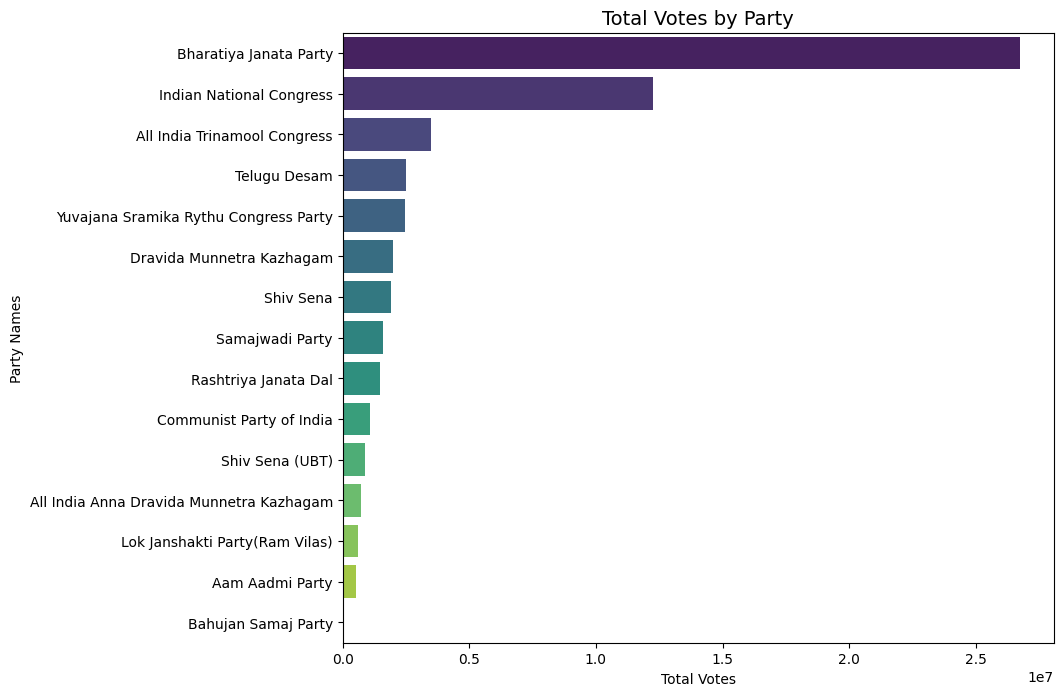

In [75]:
# Initialize a grid for multiple plots
plt.figure(figsize=(18, 20))

# 1. Bar Chart: Total Votes by Party
plt.subplot(3, 2, 1)
sns.barplot(x=party_votes.values, y=party_votes.index, palette='viridis')
plt.title('Total Votes by Party', fontsize=14)
plt.xlabel('Total Votes')
plt.ylabel('Party Names')
# Adjust layout and display the plots
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_17208\2502090739.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=party_wins, y=party_wins.index, palette='colorblind')


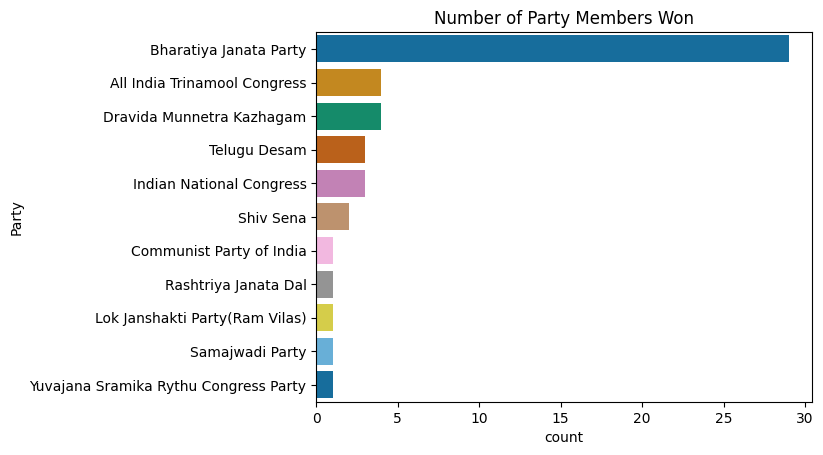

In [61]:
party_wins = df[df['Result'] == 'Won'].value_counts('Party')

plt.title('Number of Party Members Won')
sns.barplot(x=party_wins, y=party_wins.index, palette='colorblind')
plt.show()

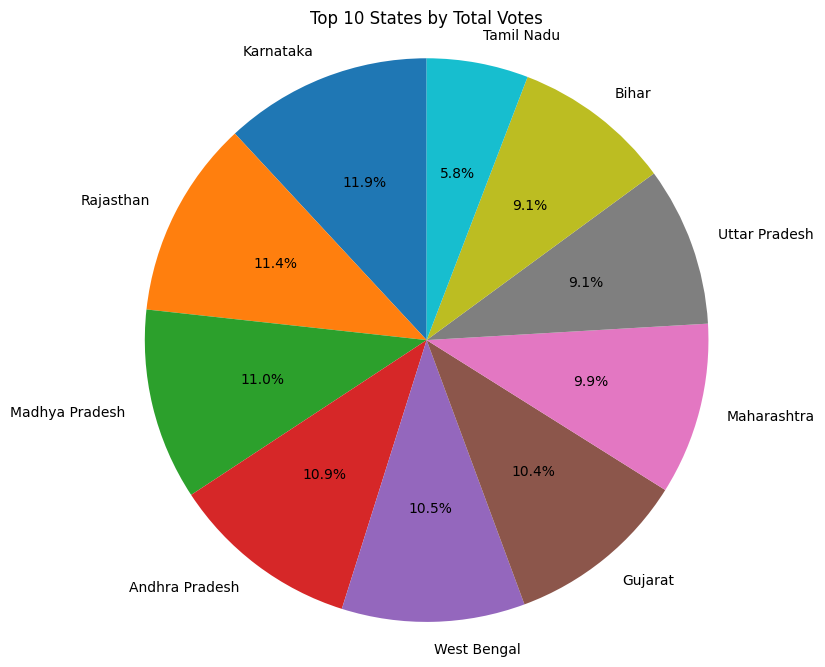

In [56]:
# Get the top 10 states by total votes
total_votes_per_state = df.groupby('State')['Total_Votes'].sum()
total_votes_per_state = total_votes_per_state.sort_values(ascending=False).head(10)

# Convert 'Total Votes' to numeric if necessary
total_votes_per_state = pd.to_numeric(total_votes_per_state)

# Create a pie chart for the total votes per state
plt.figure(figsize=(8, 8))
plt.pie(total_votes_per_state, labels=total_votes_per_state.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 States by Total Votes')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

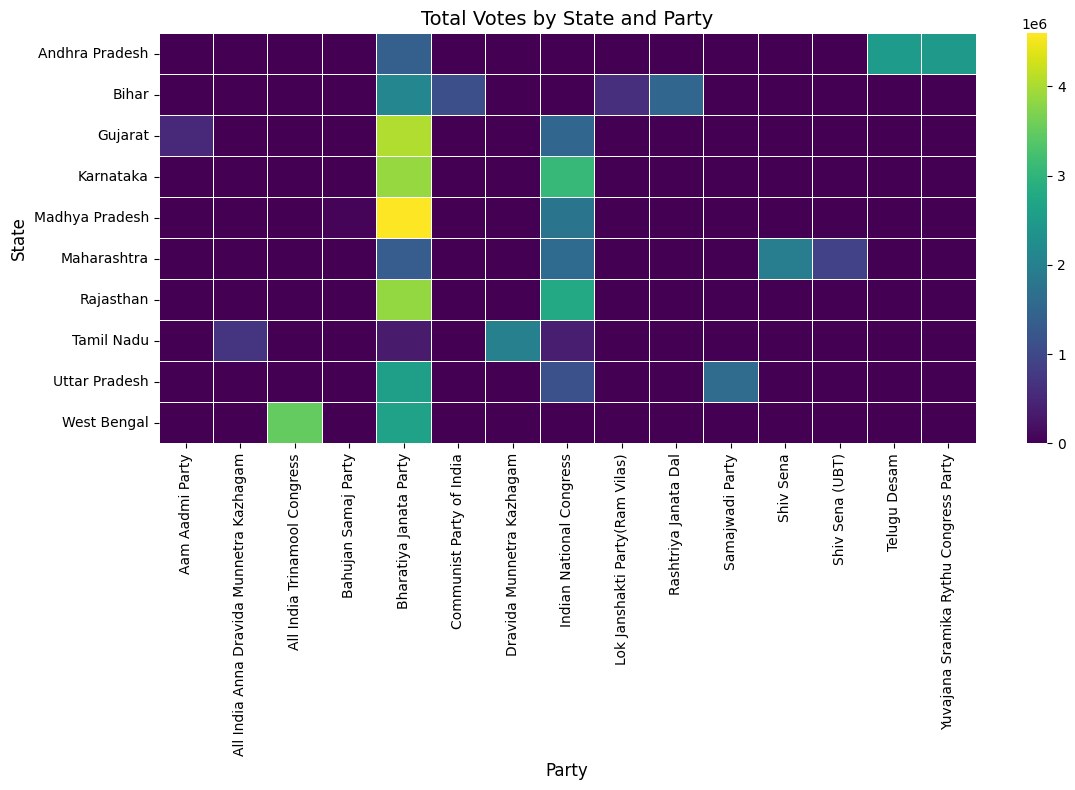

In [33]:
# Creating a pivot table for State and Party with Total Votes
heatmap_data = df.pivot_table(values='Total_Votes', index='State', columns='Party', aggfunc='sum', fill_value=0)

# Create the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=False, cbar=True, linewidths=0.5)
plt.title('Total Votes by State and Party', fontsize=14)
plt.xlabel('Party', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()
